In [111]:
import pandas as pd
df = pd.read_csv("clean6_car_price.csv")
df1 = df
df1.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,zscore
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03,86226.0,0,1,1,2017.0,1956.0,5.0,-0.083515
1,1,Renault Duster RXZ Turbo CVT,12.83,13248.0,1,0,1,2021.0,1330.0,5.0,0.058409
2,2,Toyota Camry 2.5 G,16.40,60343.0,1,0,1,2016.0,2494.0,5.0,0.239361
3,4,Volkswagen Polo 1.2 MPI Highline,5.15,69414.0,1,1,1,2016.0,1199.0,5.0,-0.330867
4,5,Volkswagen Vento 1.2 TSI Highline AT,7.66,49719.0,1,0,1,2017.0,1197.0,5.0,-0.203643


c:\Users\Gaurav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Squared Error: 8.369012013302035
Root Mean Squared Error: 2.8929244741786873
Mean Absolute Error: 2.1072191665582714


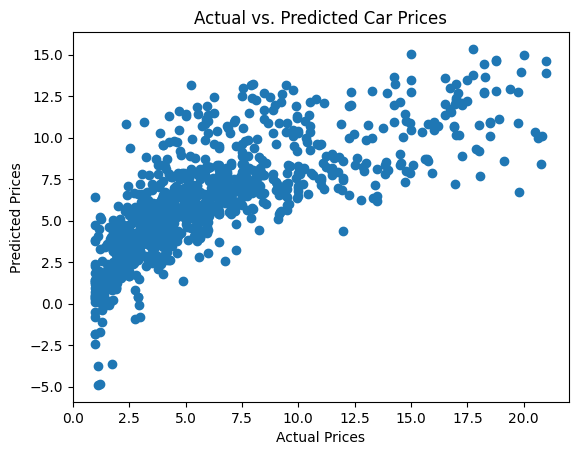

R-squared: 0.5662986352801112


In [112]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the dataset
data = pd.read_csv('clean6_car_price.csv')

# Drop unnecessary columns (like index or irrelevant features)
# data.drop(['Unnamed: 0', 'car_name'], axis=1, inplace=True)

# Split the data into features and target variable
X = df1[['engine', 'manufacture','Seats','kms_driven','ownership','fuel_type','transmission']]

y = data['car_prices_in_rupee']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

import matplotlib.pyplot as plt

# Plotting actual vs. predicted prices
plt.scatter(y_test, predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Car Prices")
plt.show()
# Get R-squared value
r_squared = model.score(X_test, y_test)
print("R-squared:", r_squared)




In [113]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:", scores)

# Print the mean and standard deviation of the scores
print("Mean Score:", scores.mean())
print("Standard Deviation of Scores:", scores.std())



Cross-Validation Scores: [0.50228291 0.52256664 0.45100244 0.52428562 0.59630087]
Mean Score: 0.5192876950599417
Standard Deviation of Scores: 0.046730715475487516


In [114]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Assuming 'X' contains your features and 'y' contains your target variable

# Initialize the model
model = LinearRegression()

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive values
cv_scores = -cv_scores

# Print the cross-validation scores
print("Cross-Validation Mean Squared Error:", cv_scores)
print("Cross-Validation Mean Squared Error (Mean):", cv_scores.mean())
print("Cross-Validation Mean Squared Error (Standard Deviation):", cv_scores.std())


Cross-Validation Mean Squared Error: [10.65417309 10.87325686  7.9795653   7.4978028   7.57502195]
Cross-Validation Mean Squared Error (Mean): 8.9159640012561
Cross-Validation Mean Squared Error (Standard Deviation): 1.5191126022390418


In [118]:
import numpy as np
# Assuming 'predictions' is your array of predicted prices and 'y_test' is the array of actual prices

# Define a tolerance level (e.g., ±5% of the actual price)
tolerance = 0.8

# Calculate the absolute percentage error for each prediction
absolute_percentage_error = np.abs(predictions - y_test) / y_test

# Calculate the percentage of predictions within the tolerance
percentage_within_tolerance = np.mean(absolute_percentage_error <= tolerance) * 100

print("Percentage of predictions within ±{}=% of actual prices: {:.2f}%".format(tolerance * 100, percentage_within_tolerance))


Percentage of predictions within ±80.0=% of actual prices: 84.42%


In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
# data = pd.read_csv("")  # Replace "your_dataset.csv" with the path to your dataset file

# Assuming 'X' contains your features and 'y' contains your target variable
X = data[['kms_driven', 'fuel_type', 'transmission', 'ownership', 'manufacture', 'engine', 'Seats']]
y = data['car_prices_in_rupee']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVR model
model = SVR(kernel='rbf')  # RBF kernel is commonly used for SVR

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
predictions = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 7.917252849066123
Root Mean Squared Error: 2.81376133477346
Mean Absolute Error: 1.8726299678383755
R-squared: 0.5897098295456249


c:\Users\Gaurav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [123]:
import numpy as np
# Assuming 'predictions' is your array of predicted prices and 'y_test' is the array of actual prices

# Define a tolerance level (e.g., ±5% of the actual price)
tolerance = 0.1

# Calculate the absolute percentage error for each prediction
absolute_percentage_error = np.abs(predictions - y_test) / y_test

# Calculate the percentage of predictions within the tolerance
percentage_within_tolerance = np.mean(absolute_percentage_error <= tolerance) * 100

print("Percentage of predictions within ±{}=% of actual prices: {:.2f}%".format(tolerance * 100, percentage_within_tolerance))



Percentage of predictions within ±10.0=% of actual prices: 21.50%
